<a href="https://colab.research.google.com/github/madanmohan-venkatesan/notebooks/blob/main/2205_14762_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [353]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF

#One-Sample Distribution Function Confidence Band using DKWM inequality

In [354]:
# def ECDF(x):
#   x=np.sort(x)
#   cdf=[np.sum(x<=x[i])/len(x) for i in range(len(x))]
#   # x=np.append(np.inf,x)
#   # cdf=np.append(0,cdf)
#   return x,cdf

In [355]:
def eps(alpha,n):
  """
  alpha: significance level
  n: sample size
  """
  return np.sqrt((np.log(2/alpha))/(2*n))

In [356]:
def fn_upper(e_cdf,data,alpha):
  """
  data: sample data
  alpha: significance level
  """
  n=len(data)
  ecdf=[e_cdf(x) for x in data]
  upper_bound=ecdf+eps(alpha,n)
  return np.minimum(1,upper_bound)


In [357]:
def fn_lower(e_cdf,data,alpha):
  """
  data: sample data
  alpha: significance level
  """
  n=len(data)
  ecdf=[e_cdf(x) for x in data]
  lower_bound=ecdf-eps(alpha,n)
  return np.maximum(0,lower_bound)


In [358]:
orig_data1=np.random.normal(0,88,1000)
orig_data2=np.random.normal(1000,25,1000)
org_data=np.hstack((orig_data1,orig_data2))
sample_data=np.random.choice(org_data,50)
alpha=0.05
org_data_cdf=ECDF(org_data)# org_data_sorted,org_data_cdf=ECDF(org_data)
sample_data_cdf=ECDF(sample_data)#sample_data_sorted,sample_data_cdf=ECDF(sample_data)
sample_upper=fn_upper(sample_data_cdf,sample_data,alpha)
sample_lower=fn_lower(sample_data_cdf,sample_data,alpha)


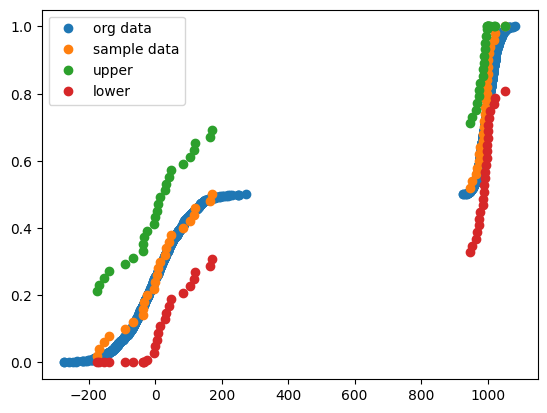

In [359]:
plt.plot(org_data,[org_data_cdf(x) for x in org_data],'o',label="org data")
plt.plot(sample_data,[sample_data_cdf(x) for x in sample_data],'o',label="sample data")
plt.plot(sample_data,sample_upper,'o',label="upper")
plt.plot(sample_data,sample_lower,'o',label="lower")
plt.legend()
plt.show()

# One sample Quantile Function Confidence Band

In [360]:
def qn(data,alpha,p):
  """
  data: sample data
  alpha: significance level
  p: quantile
  """
  sorted_data=np.sort(data)
  n=len(sorted_data)
  index=int(np.ceil(n*p))-1
  return sorted_data[index] if index > 0 else sorted_data[0]

In [361]:
def qn_upper(data,alpha,p):
  """
  data: sample data
  alpha: significance level
  p: quantile
  """
  sorted_data=np.sort(data)
  n=len(sorted_data)
  p=p+eps(alpha,n)
  index=int(np.ceil(n*p))-1
  # Ideal for right sided quantile
  # return sorted_data[index] if index < n else np.inf
  return sorted_data[index] if index < n else sorted_data[-1]


In [362]:
def qn_lower(data,alpha,p):
  """
  data: sample data
  alpha: significance level
  p: quantile
  """
  sorted_data=np.sort(data)
  n=len(sorted_data)
  p=p-eps(alpha,n)
  index=int(np.floor(n*p))+1
  #Ideal case of left sided quantile
  # return sorted_data[index] if p > 0 else np.inf
  return sorted_data[index] if p > 0 else sorted_data[0]

In [363]:
pct=np.linspace(0,1,100)
q_upper=[qn_upper(sample_data,0.05,x) for x in pct]
q_lower=[qn_lower(sample_data,0.05,x) for x in pct]
q=[qn(sample_data,0.05,x) for x in pct]

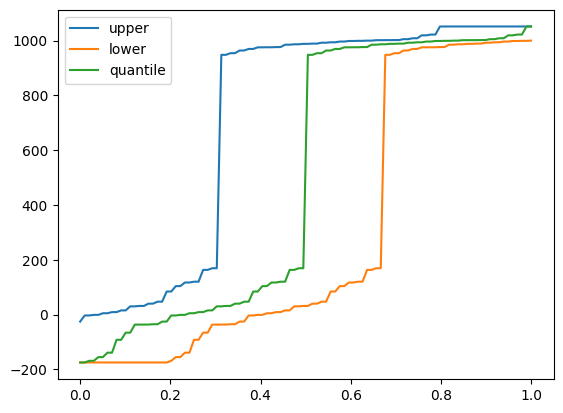

In [364]:
plt.plot(pct,q_upper,label="upper")
plt.plot(pct,q_lower,label="lower")
plt.plot(pct,q,label="quantile")
plt.legend()
plt.show()

# Two-Sample Distribution/Quantile function confidence bands

In [365]:
A_big=np.random.normal(0,2,150000)
B_big=np.random.normal(0,2,150000)
A=np.random.choice(A_big,150)
B=np.random.choice(B_big,150)
alp=0.05/2
A_cdf=ECDF(A)
B_cdf=ECDF(B)
A_fn_upper=fn_upper(A_cdf,A,alp)
A_fn_lower=fn_lower(A_cdf,A,alp)
B_fn_upper=fn_upper(B_cdf,B,alp)
B_fn_lower=fn_lower(B_cdf,B,alp)

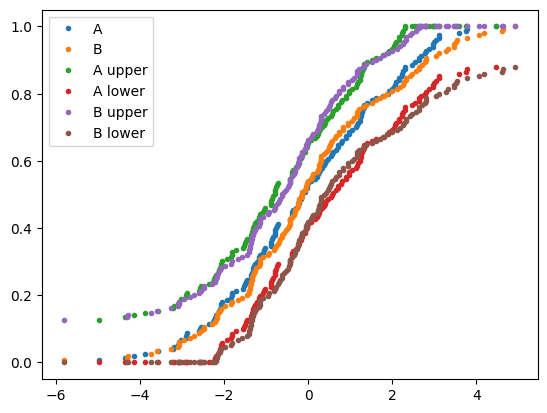

In [366]:
plt.plot(A,[A_cdf(x) for x in A],'.',label="A")
plt.plot(B,[B_cdf(x) for x in B],'.',label="B")
plt.plot(A,A_fn_upper,'.',label="A upper")
plt.plot(A,A_fn_lower,'.',label="A lower")
plt.plot(B,B_fn_upper,'.',label="B upper")
plt.plot(B,B_fn_lower,'.',label="B lower")
plt.legend()
plt.show()

In [367]:
pct=np.linspace(0,1,100)
A_qn_upper=[qn_upper(A,alp,x) for x in pct]
A_qn_lower=[qn_lower(A,alp,x) for x in pct]
A_qn=[qn(A,alp,x) for x in pct]
B_qn_upper=[qn_upper(B,alp,x) for x in pct]
B_qn_lower=[qn_lower(B,alp,x) for x in pct]
B_qn=[qn(B,alp,x) for x in pct]

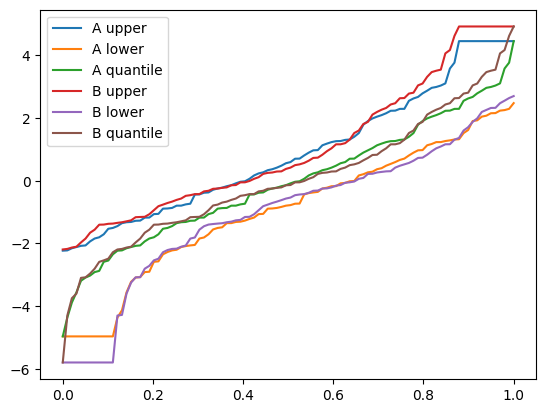

In [368]:
plt.plot(pct,A_qn_upper,label="A upper")
plt.plot(pct,A_qn_lower,label="A lower")
plt.plot(pct,A_qn,label="A quantile")
plt.plot(pct,B_qn_upper,label="B upper")
plt.plot(pct,B_qn_lower,label="B lower")
plt.plot(pct,B_qn,label="B quantile")
plt.legend()
plt.show()

# Confidence Sets on the Difference

In [369]:
# def conf_dist_diff(common_points,a_cdf_x,b_cdf_x,a_cdf_y,b_cdf_y):
#   """
#   a_cdf: cdf of sample a
#   b_cdf: cdf of sample b
#   common_points: common points of both samples
#   return: confidence set on the difference of cdfs
#   """
#   a_intr_cdf=np.interp(common_points,a_cdf_x,a_cdf_y)
#   b_intr_cdf=np.interp(common_points,b_cdf_x,b_cdf_y)
#   return b_intr_cdf-a_intr_cdf

In [370]:
def conf_dist_diff_bounds(a,b,alp,eps):
  alp=0.05
  n=len(a)
  epsilon=eps(alp/2,n)
  A_cdf=ECDF(A)
  B_cdf=ECDF(B)

  diff_upper=fn_upper(B_cdf,b,alp/2)-fn_lower(A_cdf,a,alp/2)
  diff_lower=fn_lower(B_cdf,b,alp/2)-fn_upper(A_cdf,a,alp/2)
  return diff_upper,diff_lower

In [371]:
def conf_dist_diff(a,b,alp,eps):
  alp=0.05
  n=len(a)
  epsilon=eps(alp/2,n)
  A_cdf=ECDF(A)
  B_cdf=ECDF(B)
  a_ecdf=[A_cdf(x) for x in A]
  b_ecdf=[B_cdf(x) for x in B]
  diff=np.array(b_ecdf)-np.array(a_ecdf)
  return diff

In [372]:
def conf_dist_diff_boundary(common_points,a_x,a_y,b_x,b_y):
  """
  a_x: x values of sample a
  a_y: y values of sample a
  b_x: x values of sample b
  b_y: y values of sample b
  common_points: common points of both samples
  return: confidence set on the difference of cdfs
  """
  a_intr_cdf=np.interp(common_points,a_x,a_y)
  b_intr_cdf=np.interp(common_points,b_x,b_y)
  return b_intr_cdf-a_intr_cdf


In [373]:
# common_points=np.linspace(-4,6,600)
# d_a_b=conf_dist_diff(common_points,A_sorted,B_sorted,A_cdf,B_cdf)
# dn_ab_upper=conf_dist_diff_boundary(common_points,A_sorted,A_fn_lower,B_sorted,B_fn_upper)
# dn_ab_lower=conf_dist_diff_boundary(common_points,A_sorted,A_fn_upper,B_sorted,B_fn_lower)
d_ab=conf_dist_diff(A,B,alp,eps)
d_ab_upper,d_ab_lower=conf_dist_diff_bounds(A,B,alp,eps)


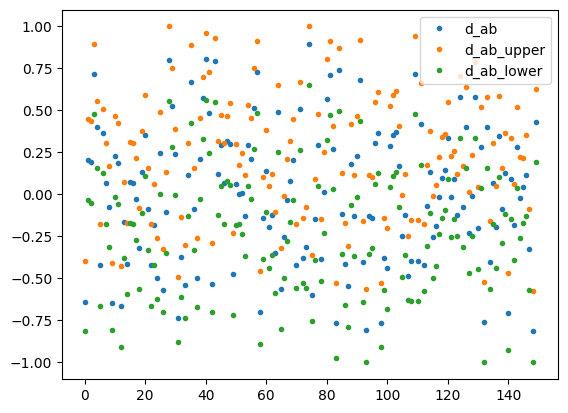

In [374]:
# plt.plot(common_points,d_a_b,label="d_a_b")
# plt.plot(common_points,dn_ab_upper,label="dn_ab_upper")
# plt.plot(common_points,dn_ab_lower,label="dn_ab_lower")
# plt.legend()
# plt.show()

plt.plot(d_ab,'.',label="d_ab")
plt.plot(d_ab_upper,'.',label="d_ab_upper")
plt.plot(d_ab_lower,'.',label="d_ab_lower")
plt.legend()
plt.show()

In [375]:
# To test F_A(x)>=F_B(x)
#Reject if True
#If rejected, accept F_A(x)<F_B(X)
d_ab_upper,d_ab_lower=conf_dist_diff_bounds(A,B,alp,eps)
np.max(d_ab_lower) > 0

np.True_

In [376]:
def eps_ab(alp,a,b):
  eps_a=eps(alp,len(a))
  eps_b=eps(alp,len(b))
  return eps_a+eps_b

In [377]:
eps_ab(alp,A,B)

np.float64(0.2417168214991496)

In [378]:
def diff_conf_interval(d_ab_l,d_ab_u):
  inf_d_unab = np.min(d_ab_u)
  sup_d_lnab = np.max(d_ab_l)
  inf_d_lnab = np.min(d_ab_l)
  sup_d_unab = np.max(d_ab_u)

  l_nab_val = np.maximum(np.abs(inf_d_unab), np.abs(sup_d_lnab))
  u_nab_val = np.maximum(np.abs(inf_d_lnab), np.abs(sup_d_unab))

  return l_nab_val, u_nab_val

In [379]:
dn_pos_ab_inf=np.max(np.maximum(d_ab,0))
eps_both=eps_ab(alp,A,B)

In [380]:
dn_pos_ab_inf

np.float64(0.8933333333333333)

In [381]:
n=len(A)
exp_term=n*(dn_pos_ab_inf**2)/2
p=2*np.exp(-exp_term)
p

np.float64(2.0279516922826925e-26)

In [382]:
from scipy.optimize import brentq
def opt_func(alp,d_ab,na,nb):
  eps_both=eps_ab(alp,na,nb)
  dn_pos_ab_inf=np.max(np.maximum(d_ab,0))
  return dn_pos_ab_inf-eps_both
func=lambda alpha:opt_func(alpha,d_ab,A,B)
ALP_MAX=1
ALP_MIN=1e-9


In [383]:
func(ALP_MIN
     )

np.float64(0.35896251305330396)

In [384]:
try:
  if func(ALP_MAX) <= 0:
    p=1
except ValueError: # handle cases where log(1612/alpha) or similar becomes problematic at alpha=1
  p=1

try:
  if func(ALP_MIN) >= 0:
    p=ALP_MIN
except ValueError: # handle cases where log(1612/alpha) for very small alpha is problematic
  p=ALP_MIN

try:
  p = brentq(func, ALP_MIN, ALP_MAX)
  print(p)
except ValueError:
        # This error occurs if the signs at the bounds are not opposite,
        # or if the function is problematic within the interval.
        # This should ideally be caught by the checks above, but as a fallback.
        # It implies no clear root in the interval or numerical instability.
  p = 1.0 # Default to non-rejection if no root can be confidently found.

In [385]:
p

1.0

quantiles confidence sets

In [386]:
def q_q_conf_dist_diff_bounds(a,b,alp,eps):
  alp=0.05
  n=len(a)
  epsilon=eps(alp/2,n)
  A_qn=[qn(A,alp,x) for x in pct]
  B_qn=[qn(B,alp,x) for x in pct]
  aqn_upper=[qn_upper(A,alp,x) for x in pct]
  aqn_lower=[qn_lower(A,alp,x) for x in pct]
  bqn_upper=[qn_upper(B,alp,x) for x in pct]
  bqn_lower=[qn_lower(B,alp,x) for x in pct]

  q_diff_upper=np.array(bqn_upper)-np.array(aqn_lower)
  q_diff_lower=np.array(bqn_lower)-np.array(aqn_upper)
  return q_diff_upper,q_diff_lower
def q_conf_dist_diff(a,b,alp,eps):
  alp=0.05
  n=len(a)
  epsilon=eps(alp/2,n)
  A_qn=[qn(A,alp,x) for x in pct]
  B_qn=[qn(B,alp,x) for x in pct]
  diff=np.array(B_qn)-np.array(A_qn)
  return diff

q_d_ab=q_conf_dist_diff(A,B,alp,eps)
q_d_ab_upper,q_d_ab_lower=q_q_conf_dist_diff_bounds(A,B,alp,eps)


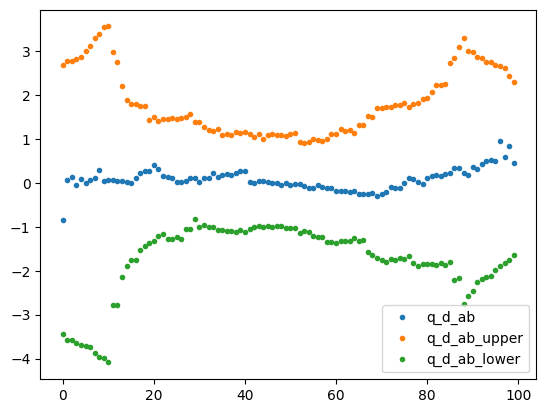

In [387]:
plt.plot(q_d_ab,'.',label="q_d_ab")
plt.plot(q_d_ab_upper,'.',label="q_d_ab_upper")
plt.plot(q_d_ab_lower,'.',label="q_d_ab_lower")
plt.legend()
plt.show()


In [388]:
# To test F_A(x)>=F_B(x)
#Reject if True
#If rejected, accept F_A(x)<F_B(X)
q_d_ab_upper,q_d_ab_lower=q_q_conf_dist_diff_bounds(A,B,alp,eps)
np.max(q_d_ab_lower) > 0

np.False_

In [389]:
def eps_ab(alp,a,b):
  eps_a=eps(alp,len(a))
  eps_b=eps(alp,len(b))
  return eps_a+eps_b
print(eps_ab(alp,A,B))

0.2417168214991496


In [390]:
def diff_conf_interval(q_d_ab_l,q_d_ab_u):
  inf_d_unab = np.min(q_d_ab_u)
  sup_d_lnab = np.max(q_d_ab_l)
  inf_d_lnab = np.min(q_d_ab_l)
  sup_d_unab = np.max(q_d_ab_u)

  l_nab_val = np.maximum(np.abs(inf_d_unab), np.abs(sup_d_lnab))
  u_nab_val = np.maximum(np.abs(inf_d_lnab), np.abs(sup_d_unab))

  return l_nab_val, u_nab_val
dn_pos_ab_inf=np.max(np.maximum(q_d_ab,0))
eps_both=eps_ab(alp,A,B)
print(dn_pos_ab_inf)

0.9574358786712831


In [391]:
n=len(A)
exp_term=n*(dn_pos_ab_inf**2)/2
p=2*np.exp(-exp_term)
print(p)


2.7716431460584342e-30


In [392]:
from scipy.optimize import brentq
def opt_func(alp,q_d_ab,na,nb):
  eps_both=eps_ab(alp,na,nb)
  dn_pos_ab_inf=np.max(np.maximum(q_d_ab,0))
  return dn_pos_ab_inf-eps_both
func=lambda alpha:opt_func(alpha,q_d_ab,A,B)
ALP_MAX=1
ALP_MIN=1e-9
try:
  if func(ALP_MAX) <= 0:
    p=1
except ValueError: # handle cases where log(1612/alpha) or similar becomes problematic at alpha=1
  p=1

try:
  if func(ALP_MIN) >= 0:
    p=ALP_MIN
except ValueError: # handle cases where log(1612/alpha) for very small alpha is problematic
  p=ALP_MIN

try:
  p = brentq(func, ALP_MIN, ALP_MAX)
  print(p)
except ValueError:
        # This error occurs if the signs at the bounds are not opposite,
        # or if the function is problematic within the interval.
        # This should ideally be caught by the checks above, but as a fallback.
        # It implies no clear root in the interval or numerical instability.
  p = 1.0 # Default to non-rejection if no root can be confidently found.
print(p)

1.0


# Obtain tighter quantile boundaries

In [393]:
def eps_quantiles(alpha,n):
  """
  alpha: significance level
  n: sample size
  """
  numerator=(np.log(np.log(np.exp(1)*n)))+(0.8*(np.log(1612/alpha)))
  denominator=n
  # print(n)
  # print(numerator/denominator)
  # print(np.sqrt(numerator/denominator))
  full_form=0.85*(np.sqrt(numerator/denominator))
  return full_form

In [394]:
def qn_quantiles(data,alpha,p):
  """
  data: sample data
  alpha: significance level
  p: quantile
  """
  sorted_data=np.sort(data)
  n=len(sorted_data)
  index=int(np.ceil(n*p))-1
  return sorted_data[index] if index > 0 else sorted_data[0]

In [395]:
def qn_upper_quantiles(data,alpha,p):
  """
  data: sample data
  alpha: significance level
  p: quantile
  """
  sorted_data=np.sort(data)
  n=len(sorted_data)
  p=p+eps_quantiles(alpha,n)
  index=int(np.ceil(n*p))-1
  # Ideal case for right sided quantiles
  # return sorted_data[index] if index < n else np.inf
  return sorted_data[index] if index < n else sorted_data[-1]

In [396]:
def qn_lower_quantiles(data,alpha,p):
  """
  data: sample data
  alpha: significance level
  p: quantile
  """
  sorted_data=np.sort(data)
  n=len(sorted_data)
  p=p-eps_quantiles(alpha,n)
  index=int(np.floor(n*p))+1
  # Ideal case for left sided quantiles
  # return sorted_data[index] if p > 0 else np.inf
  return sorted_data[index] if p > 0 else sorted_data[0]

In [397]:
A=np.random.normal(10,2,600)
B=np.random.normal(10,9,600)
alp=0.05/2

In [398]:
pct=np.linspace(0,1,100)
A_qn_upper=[qn_upper_quantiles(A,alp,x) for x in pct]
A_qn_lower=[qn_lower_quantiles(A,alp,x) for x in pct]
A_qn=[qn_quantiles(A,alp,x) for x in pct]
B_qn_upper=[qn_upper_quantiles(B,alp,x) for x in pct]
B_qn_lower=[qn_lower_quantiles(B,alp,x) for x in pct]
B_qn=[qn_quantiles(B,alp,x) for x in pct]

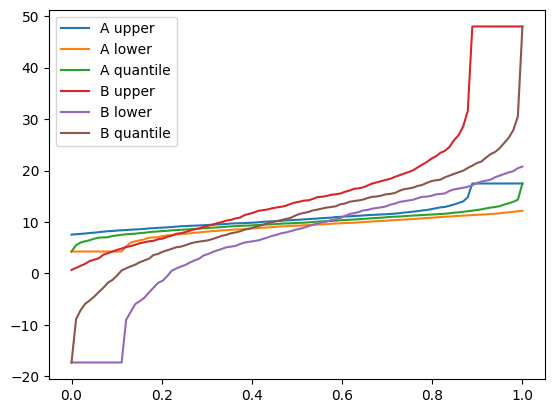

In [399]:
plt.plot(pct,A_qn_upper,label="A upper")
plt.plot(pct,A_qn_lower,label="A lower")
plt.plot(pct,A_qn,label="A quantile")
plt.plot(pct,B_qn_upper,label="B upper")
plt.plot(pct,B_qn_lower,label="B lower")
plt.plot(pct,B_qn,label="B quantile")
plt.legend()
plt.show()

In [400]:
qn_ab_upper=np.subtract(B_qn_upper,A_qn_lower)
qn_ab_lower=np.subtract(B_qn_lower,A_qn_upper)
qn_ab=np.subtract(B_qn,A_qn)

In [401]:
qn_ab_upper

array([-3.57529914e+00, -3.18062114e+00, -2.77778545e+00, -2.39336301e+00,
       -1.83957085e+00, -1.58971666e+00, -1.31632650e+00, -6.33334201e-01,
       -3.14805517e-01,  6.50997678e-03,  2.97331830e-01,  5.77814433e-01,
       -8.28188362e-02, -6.87797247e-01, -6.60930000e-01, -5.75079884e-01,
       -5.66202472e-01, -6.97063231e-01, -6.70036439e-01, -3.90732768e-01,
       -4.80246865e-01, -2.75098421e-01, -1.09409266e-01,  1.37264276e-01,
        1.43915507e-01,  3.29339765e-01,  5.19270893e-01,  6.70791168e-01,
        7.43636101e-01,  9.80096474e-01,  1.11141598e+00,  1.26279453e+00,
        1.48678593e+00,  1.60085811e+00,  1.85915202e+00,  1.92951846e+00,
        2.14445416e+00,  2.28574623e+00,  2.70813341e+00,  2.85421542e+00,
        3.04191913e+00,  3.35150575e+00,  3.39770031e+00,  3.49607799e+00,
        3.66710745e+00,  3.74597635e+00,  3.81268542e+00,  3.95272406e+00,
        4.24254697e+00,  4.47066611e+00,  4.64005498e+00,  4.79270747e+00,
        4.80661112e+00,  

In [402]:
qn_ab_lower[np.isfinite(qn_ab_lower)].max()

np.float64(3.284655851383679)

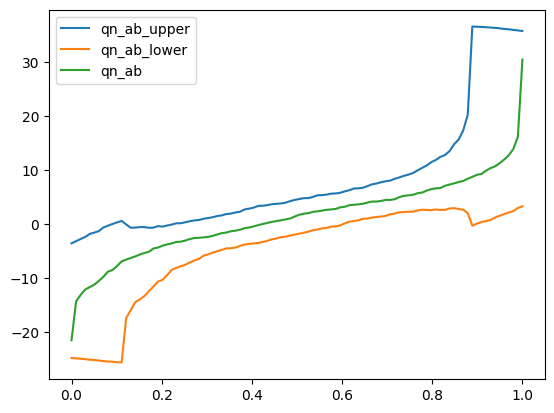

In [403]:
plt.plot(pct,qn_ab_upper,label="qn_ab_upper")
plt.plot(pct,qn_ab_lower,label="qn_ab_lower")
plt.plot(pct,qn_ab,label="qn_ab")
plt.legend()
plt.show()


In [404]:
qn_ab_lower[np.isfinite(qn_ab_lower)].max()

np.float64(3.284655851383679)

In [405]:
ln_ab=np.maximum(
    np.abs(
        qn_ab_upper[np.isfinite(qn_ab_upper)].min()
        ),
    np.abs(
        qn_ab_lower[np.isfinite(qn_ab_lower)].max()
    )
)
ln_ab

np.float64(3.5752991444743927)

In [406]:
un_ab=np.maximum(
    np.abs(
        qn_ab_lower[np.isfinite(qn_ab_lower)].min()
        ),
    np.abs(
        qn_ab_upper[np.isfinite(qn_ab_upper)].max()
    )
)
un_ab

np.float64(36.630205303636934)

# Calcuation of threshold Tau ($\tau$)


$\tau$ is defined as:

${U_{n_a,n_b} (\alpha) \le \tau} $

We are choosing $\tau$ to be ${U_{n_a,n_b} (\alpha)+1}$ for this POC

In [407]:
tau=un_ab+1
tau
# tau=0.05

np.float64(37.630205303636934)

# Choosing Radius (r):



Radius(r) is defined as:

${r \le \tau/2}$

We are choosing r to be ${(\tau/2) - 1}$


In [408]:
# r=0.02
r=tau/2-1
r

np.float64(17.815102651818467)

# Sample size calcuation

Sample size(n) can be calcuated as follows:

$n = 2 \frac{\log (4/\alpha)}{r^2}$

In [409]:
# n=2*(np.log(4/alpha))/(r**2)
n=14
n

14

In [410]:
epsn=eps_quantiles(0.05,n)
epsn

np.float64(0.7037383748693672)

In [411]:
epsn=eps_quantiles(0.05,1000)
epsn

np.float64(0.08656912837667055)

# Stopping rules for $A \le B$:

$\sup {d^{l}_{n_a,n_b}(\alpha,x)>0}$

In [412]:
stop_factor=qn_ab_lower[np.isfinite(qn_ab_lower)].max()
print(f"Stop factor:{stop_factor}")
if stop_factor>0:
  print("B>A: Stopping rule satisfied")
else:
  print("B<A: Stopping rule not satisfied")

Stop factor:3.284655851383679
B>A: Stopping rule satisfied


## P-value for ${A \le B}$:


## ${P^{\le}_{n_a,n_b}=2e^{- \frac {n||d^{+}_{n_a,n_b}||^{2}_ ∞} {2}}}$


In [413]:
# n=len(A)
qn_ab_plus=np.maximum(np.max(qn_ab),0)
p_value=2*np.exp(-(n*(qn_ab_plus**2))/(2))
p_value

np.float64(0.0)

In [414]:
qn_ab_plus

np.float64(30.499993518330996)

$P^{\le}_{n_a,n_b} = \frac {3624}{e^{\frac {n(\frac {\frac{||d^{+}_{n_a,n_b}||_{\infty}}{2}}{0.85})^{2}-\log log(en)}{0.8}}}$

In [415]:
#works good
# n=len(A)
# numerator = qn_ab_plus / (2 * 0.85)
numerator = (qn_ab_plus) / (0.85)
log_term = np.log(np.log(np.exp(1) * n))
# Debugging: Log intermediate values
print(f"numerator: {numerator}")
print(f"log_term: {log_term}")
exponent = (n * (numerator ** 2 - log_term)) / 0.8
# Debugging: Log intermediate values
print(f"exponent: {exponent}")
term2 = np.exp(exponent)
p_value = 3624 / term2
#if overflow do try catch and return 1
#if return min(p,1)

numerator: 35.88234531568352
log_term: 1.2917246727283112
exponent: 22509.392161921467


/tmp/ipython-input-3700960024.py:12: RuntimeWarning: overflow encountered in exp
  term2 = np.exp(exponent)


In [416]:
p_value

np.float64(0.0)

In [417]:
np.sqrt(p_value)

np.float64(0.0)

# References
[1] [ECDF](https://machinelearningmastery.com/empirical-distribution-function-in-python/)

[2] [Inverse distribtion functions](https://stats.stackexchange.com/questions/212813/help-me-understand-the-quantile-inverse-cdf-function)